# Exercise 1
## Support Vector Machines
Perception is an important step for autonomous systems. We will look into one method of classifying data given a dataset containing inputs and corresponding targets. In this case we will look at the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), but it could be any arbitrary dataset.

Today we will work with classification using [Support Vector Machines (SVM)](https://en.wikipedia.org/wiki/Support-vector_machine).
We will use the implementation from the `sklearn` library. 

**Note**: If the import of the `pandas` library fails because the module isn't installed, install the `pandas` library with pip.

In [92]:
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Helper function for plotting the fit of your SVM.
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

As mentioned previously, we're using the Iris dataset. It consists of 150 samples with 4 featuers each.
We're using the sepal length and the sepal width as features to predict which species of the Iris flower one sample is.
The target classes are integer-encoded.

In [93]:
# Import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = iris_df.iloc[:,:2]
display(X)
y = iris.target
print("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Number of samples :: 150
Number of features :: 2


## Pandas
We will use pandas to manage our data.
Initially we will only use the two first data points, i.e. the sepal length and sepal width.

We plot the data and we can see all our samples

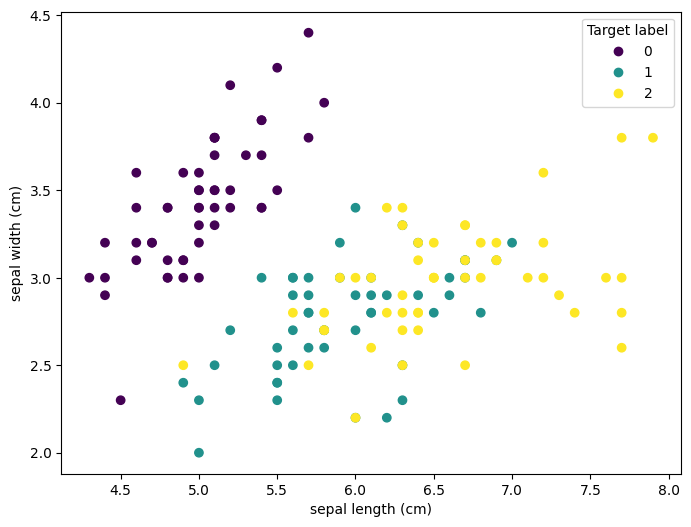

In [94]:
fig1 = plt.figure(1, figsize=(8, 6))
ax = plt.scatter(X['sepal length (cm)'], X["sepal width (cm)"], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.legend(*ax.legend_elements(), title='Target label')
plt.show()

## Normalization.
Using `sklearn.preprocessing` we can normalize the data to have zero mean and unitary variance.
Why could that be important?
```{Python}
X_scaled = StandardScaler().fit_transform(X)
```
Plot the data, did you succed with normalizing the data?



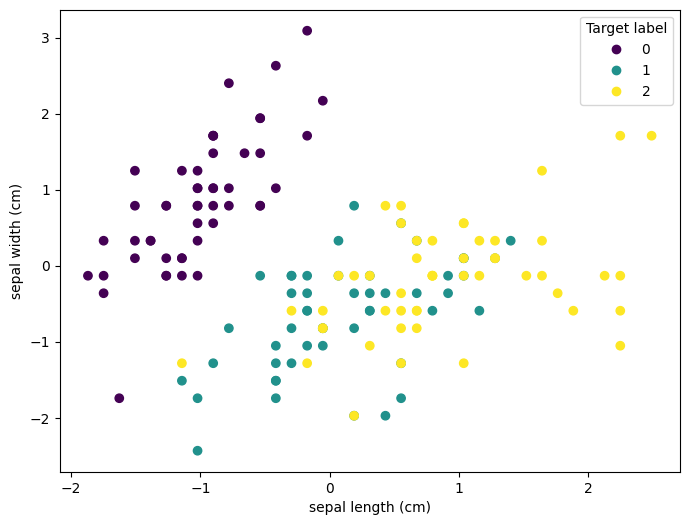

In [95]:
# Data normalization
X_scaled = StandardScaler().fit_transform(X)

# Plot the normalized data
fig2 = plt.figure(2, figsize=(8, 6))
ax = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.legend(*ax.legend_elements(), title='Target label')
plt.show()

### Training / testing split.
We now create a training and testing set.
The training set is to train our model and the testing set is to make sure we don't overfit to the data. We can use the test set to analyze this.

You can use the following function to create your training and testing split:
```{Python}
train_test_split(data, target, test_size=n)
```

In [96]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Train and test the accuracy of your model
Using `LinearSVC` from `sklearn`:
```{Python}
sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)
```
[Documentation for LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC)

You can test the accuracy of your trained model with:
```{}
clf.score(X_train, y_train)
clf.score(X_test, y_test)
```

And finally, plot your fit with the provided plot function `plot_fit`

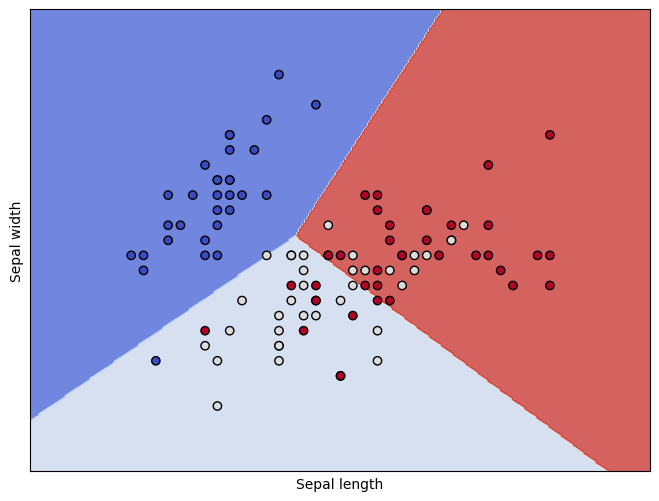

In [97]:
# Train the model
sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)

# Fit the model
clf = sk.svm.LinearSVC().fit(X_train, y_train)

# Plot the fit
plot_fit(X_train, y_train, clf)
plt.show()

## Exercises
### 1) Kernel
First exersice is to try other kernels than the linear:
```{python}
svc = svm.SVC(kernel='linear', C=C)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C))
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C))
```
[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Do you get better results?


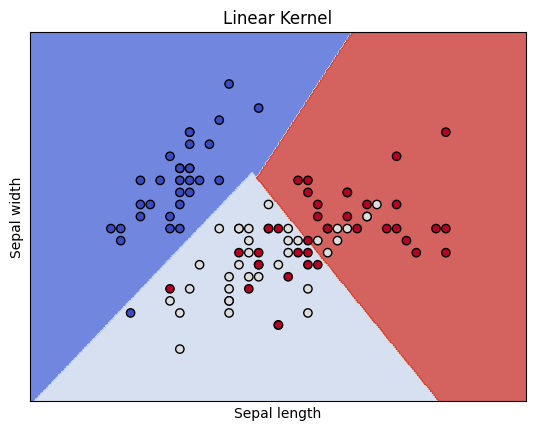

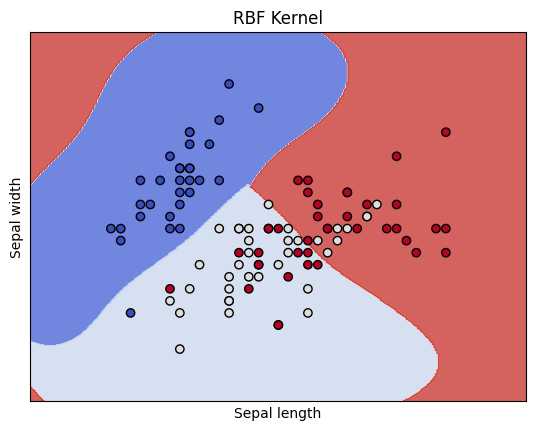

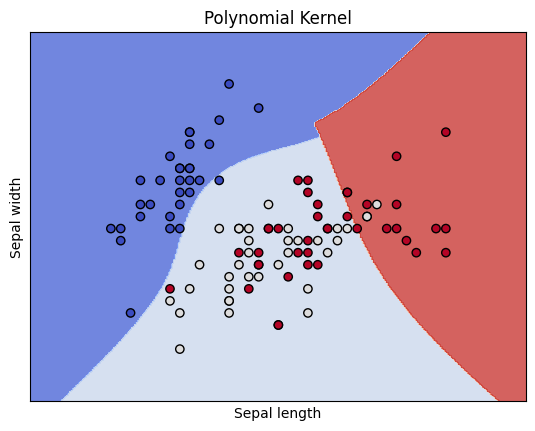

In [98]:
# Try other kernels
svc = sk.svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
fig_linear = plt.figure()
plot_fit(X_train, y_train, svc)
plt.title('Linear Kernel')
plt.show()

rbf_svc = sk.svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, y_train)
fig_rbf = plt.figure()
plot_fit(X_train, y_train, rbf_svc)
plt.title('RBF Kernel')
plt.show()

poly_svc = sk.svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
fig_poly = plt.figure()
plot_fit(X_train, y_train, poly_svc)
plt.title('Polynomial Kernel')
plt.show()

### 2 ) More dimensions
Now use 3 features for each sample. So either you add the petal length or petal width as an additional feature.

Can you get a better fit?

Can you visualize your predictions? 
Make a 3D scatterplot with colors for each predicted class.
```{Python}
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x, y, z, c=class_vector)
```



Number of samples :: 150
Number of features :: 3


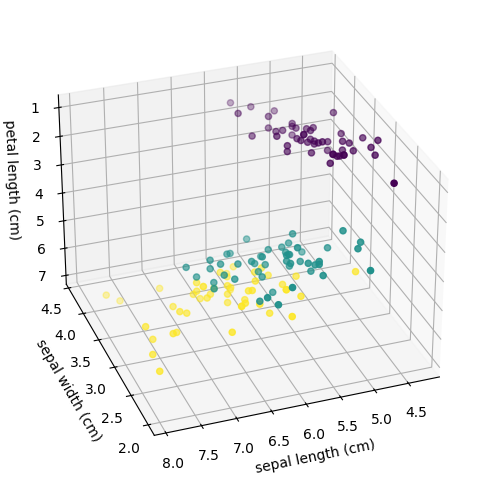

Training Accuracy: 0.95
Testing Accuracy: 1.00


In [99]:
from sklearn.svm import SVC  # Make sure SVC is imported
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Now 3 features for each sample (sepal length, sepal width, petal length)
X = iris_df.iloc[:, :3]
y = iris.target
print("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

# Create the 3D figure
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.scatter(X['sepal length (cm)'], X["sepal width (cm)"], X["petal length (cm)"], c=y)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal length (cm)")

# Display the plot inline
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.7, C=1)
svm_model.fit(X_train_scaled, y_train)

# Predict the classes on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's accuracy
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



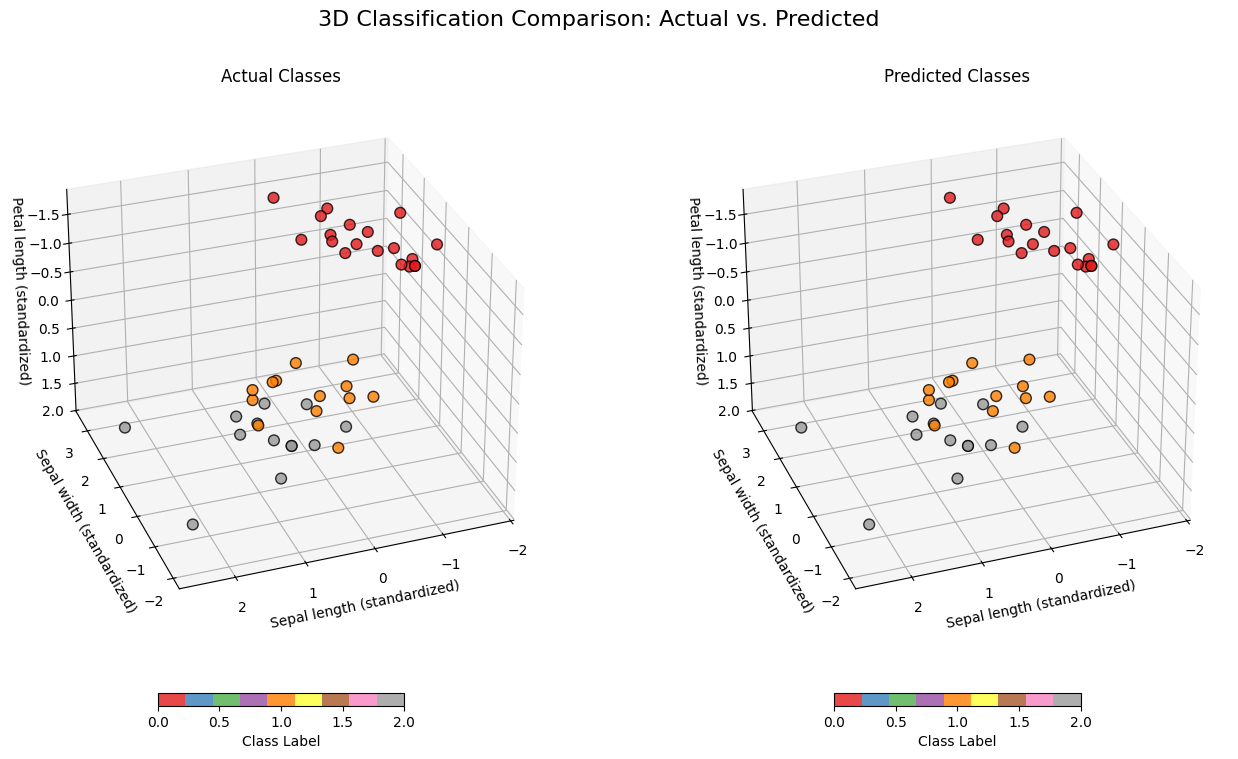

In [100]:
# Improved 3D visualization with side-by-side comparison
fig = plt.figure(figsize=(16, 8))

# Plot for actual classes
ax1 = fig.add_subplot(121, projection='3d', elev=-150, azim=110)
scatter1 = ax1.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], 
                       c=y_test, cmap=plt.cm.Set1, s=60, alpha=0.8, edgecolors='k')
ax1.set_title('Actual Classes')
ax1.set_xlabel('Sepal length (standardized)')
ax1.set_ylabel('Sepal width (standardized)')
ax1.set_zlabel('Petal length (standardized)')

# Color bar for actual classes
cbar1 = fig.colorbar(scatter1, ax=ax1, orientation='horizontal', fraction=0.02, pad=0.1)
cbar1.set_label('Class Label')

# Plot for predicted classes
ax2 = fig.add_subplot(122, projection='3d', elev=-150, azim=110)
scatter2 = ax2.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], 
                       c=y_pred, cmap=plt.cm.Set1, s=60, alpha=0.8, edgecolors='k')
ax2.set_title('Predicted Classes')
ax2.set_xlabel('Sepal length (standardized)')
ax2.set_ylabel('Sepal width (standardized)')
ax2.set_zlabel('Petal length (standardized)')

# Color bar for predicted classes
cbar2 = fig.colorbar(scatter2, ax=ax2, orientation='horizontal', fraction=0.02, pad=0.1)
cbar2.set_label('Class Label')

# Connecting points where predictions differ from actual labels
for i in range(len(X_test_scaled)):
    if y_test[i] != y_pred[i]:
        ax2.plot([X_test_scaled[i, 0], X_test_scaled[i, 0]], 
                 [X_test_scaled[i, 1], X_test_scaled[i, 1]], 
                 [X_test_scaled[i, 2], X_test_scaled[i, 2]], 
                 'r--', alpha=0.6)  # Red dashed line for mismatches

plt.suptitle('3D Classification Comparison: Actual vs. Predicted', fontsize=16)

# Show the plots
plt.show()

### 3) Even more dimensions
Finally try fitting the classifier with all features, i.e. 4 features per sample.

Number of samples :: 150
Number of features :: 4
Training Accuracy: 0.96
Testing Accuracy: 1.00


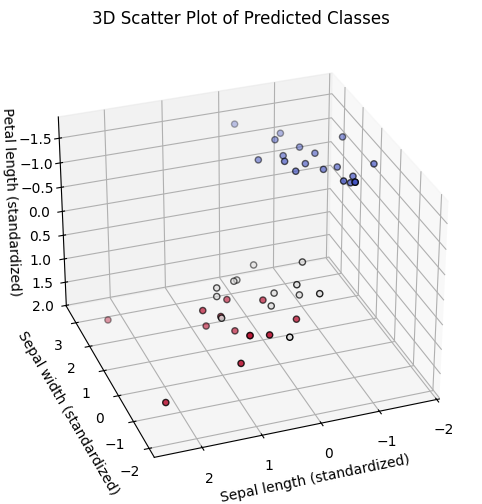

In [101]:
# Use all the features
X = iris_df
y = iris.target
print("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.7, C=1)
svm_model.fit(X_train_scaled, y_train)

# Predict the classes on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's accuracy
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Create a 3D scatter plot of the test set with predicted classes
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Sepal length (standardized)')
ax.set_ylabel('Sepal width (standardized)')
ax.set_zlabel('Petal length (standardized)')
ax.set_title('3D Scatter Plot of Predicted Classes')

# Display the plot inline
plt.show()


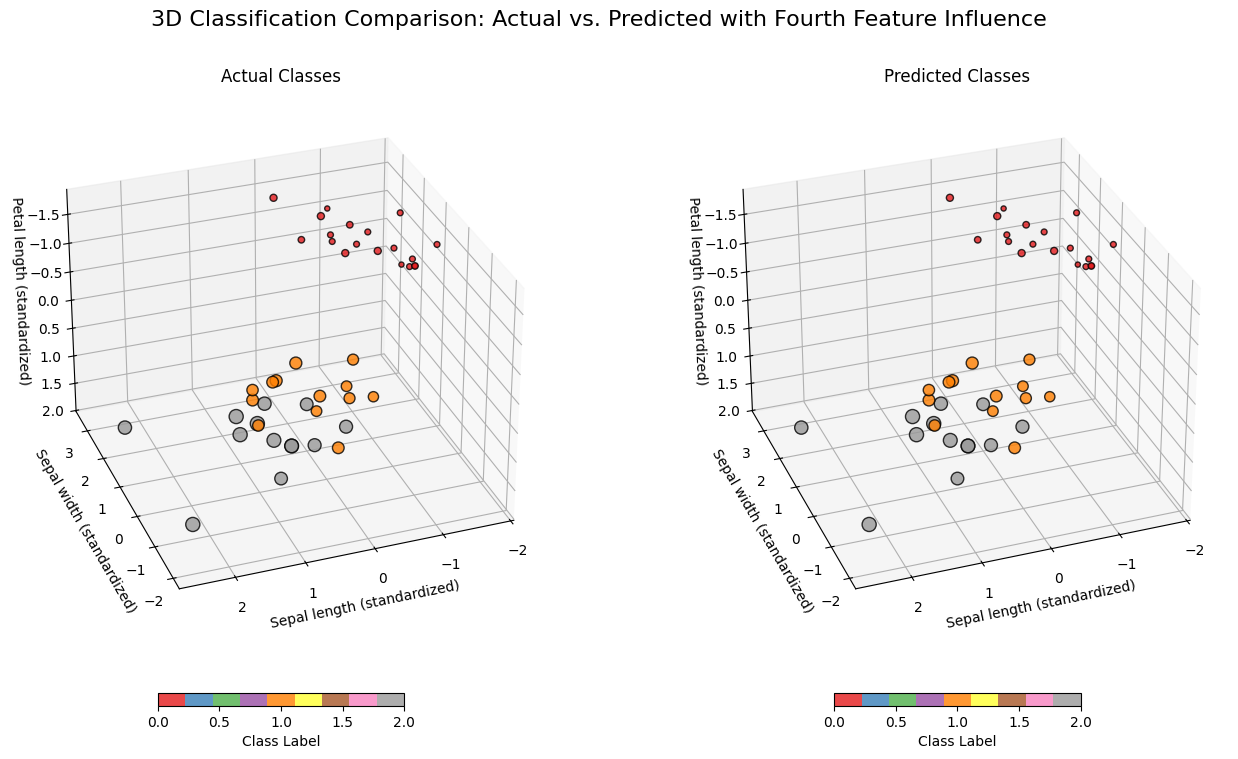

In [102]:
# Improved 3D visualization for four features
fig = plt.figure(figsize=(16, 8))

# Select the first three features for the 3D plot
X_test_3d = X_test_scaled[:, :3]
fourth_feature = X_test_scaled[:, 3]  # Use the fourth feature for color or size

# Plot for actual classes
ax1 = fig.add_subplot(121, projection='3d', elev=-150, azim=110)
scatter1 = ax1.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], 
                       c=y_test, cmap=plt.cm.Set1, s=60 + fourth_feature * 30, alpha=0.8, edgecolors='k')
ax1.set_title('Actual Classes')
ax1.set_xlabel('Sepal length (standardized)')
ax1.set_ylabel('Sepal width (standardized)')
ax1.set_zlabel('Petal length (standardized)')

# Color bar for actual classes
cbar1 = fig.colorbar(scatter1, ax=ax1, orientation='horizontal', fraction=0.02, pad=0.1)
cbar1.set_label('Class Label')

# Plot for predicted classes
ax2 = fig.add_subplot(122, projection='3d', elev=-150, azim=110)
scatter2 = ax2.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], 
                       c=y_pred, cmap=plt.cm.Set1, s=60 + fourth_feature * 30, alpha=0.8, edgecolors='k')
ax2.set_title('Predicted Classes')
ax2.set_xlabel('Sepal length (standardized)')
ax2.set_ylabel('Sepal width (standardized)')
ax2.set_zlabel('Petal length (standardized)')

# Color bar for predicted classes
cbar2 = fig.colorbar(scatter2, ax=ax2, orientation='horizontal', fraction=0.02, pad=0.1)
cbar2.set_label('Class Label')

# Connecting points where predictions differ from actual labels
for i in range(len(X_test_3d)):
    if y_test[i] != y_pred[i]:
        ax2.plot([X_test_3d[i, 0], X_test_3d[i, 0]], 
                 [X_test_3d[i, 1], X_test_3d[i, 1]], 
                 [X_test_3d[i, 2], X_test_3d[i, 2]], 
                 'r--', alpha=0.6)  # Red dashed line for mismatches

plt.suptitle('3D Classification Comparison: Actual vs. Predicted with Fourth Feature Influence', fontsize=16)

# Show the plots
plt.show()
